In [47]:
import pandas as pd

# load
campaigns = pd.read_csv(r"C:\Users\ayesh\OneDrive\Documents\Channel affinity\data\campaigns_daily.csv", parse_dates=["Date"])
customers = pd.read_csv(r"C:\Users\ayesh\OneDrive\Documents\Channel affinity\data\customers.csv", parse_dates=["First_Seen_Date"])
emails = pd.read_csv(r"C:\Users\ayesh\OneDrive\Documents\Channel affinity\data\email_events.csv", parse_dates=["Date"])
sessions = pd.read_csv(r"C:\Users\ayesh\OneDrive\Documents\Channel affinity\data\sessions.csv", parse_dates=["Date"])


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [48]:
datasets = {
    "campaigns_daily": campaigns,
    "customers": customers,
    "email_events": emails,
    "sessions": sessions,
}

for name, df in datasets.items():
    print("\n----", name, "----")
    print("Shape:", df.shape)
    print(df.info())



---- campaigns_daily ----
Shape: (897521, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897521 entries, 0 to 897520
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             897521 non-null  datetime64[ns]
 1   Campaign_ID      897521 non-null  int64         
 2   Company          897521 non-null  object        
 3   Channel          897521 non-null  object        
 4   Campaign_Type    897521 non-null  object        
 5   Target_Audience  897521 non-null  object        
 6   Impressions      897521 non-null  int64         
 7   Clicks           897521 non-null  int64         
 8   Spend            897521 non-null  float64       
 9   Conversions      897521 non-null  int64         
 10  Revenue          897521 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 75.3+ MB
None

---- customers ----
Shape: (400000, 9)
<class 'panda

In [49]:
for name, df in datasets.items():
    print("\n---- Missing %:", name, "----")
    print((df.isna().mean()*100).round(2).sort_values(ascending=False))


---- Missing %: campaigns_daily ----
Date               0.0
Campaign_ID        0.0
Company            0.0
Channel            0.0
Campaign_Type      0.0
Target_Audience    0.0
Impressions        0.0
Clicks             0.0
Spend              0.0
Conversions        0.0
Revenue            0.0
dtype: float64

---- Missing %: customers ----
Customer_ID            0.0
Age                    0.0
Gender                 0.0
Location               0.0
Language               0.0
Customer_Segment       0.0
Acquisition_Channel    0.0
First_Seen_Date        0.0
Total_Revenue          0.0
dtype: float64

---- Missing %: email_events ----
Email_Event_ID    0.0
Date              0.0
Campaign_ID       0.0
Customer_ID       0.0
Sent              0.0
Opened            0.0
Clicked           0.0
Bounced           0.0
dtype: float64

---- Missing %: sessions ----
Session_ID          0.0
Date                0.0
Customer_ID         0.0
Campaign_ID         0.0
Channel             0.0
Device              0.0
Lan

In [35]:
for name, df in datasets.items():
    print("\n---- Unique counts:", name, "----")
    print(df.nunique().sort_values(ascending=False).head(20))



---- Unique counts: campaigns_daily ----
ROAS               714333
CTR                619944
CPA                468143
Spend              313152
Revenue            244134
CVR                 92182
Impressions         52499
Clicks               8199
Campaign_ID          5000
Conversions           664
Date                  365
Company                 7
Channel                 6
Target_Audience         5
Campaign_Type           5
dtype: int64

---- Unique counts: customers ----
Customer_ID            400000
Total_Revenue           51890
First_Seen_Date           328
Age                         8
Location                    6
Acquisition_Channel         6
Language                    5
Customer_Segment            5
Gender                      3
dtype: int64

---- Unique counts: email_events ----
Email_Event_ID    2910750
Customer_ID        399722
Campaign_ID           690
Date                  365
Opened                  2
Clicked                 2
Bounced                 2
Sent           

In [50]:
print("Duplicate session IDs:", sessions['Session_ID'].duplicated().sum())
print("Duplicate customer IDs:", customers['Customer_ID'].duplicated().sum())
print("Duplicate email event IDs:", emails['Email_Event_ID'].duplicated().sum())
print("Duplicate campaign rows:", campaigns.duplicated().sum())

Duplicate session IDs: 0
Duplicate customer IDs: 0
Duplicate email event IDs: 0
Duplicate campaign rows: 0


In [51]:
numeric_cols = {
    "campaigns_daily": ["Impressions","Clicks","Spend","Conversions","Revenue"],
    "sessions": ["Page_Views","Session_Duration","Clicks","Conversion","Conversion_Value","Acquisition_Cost","Engagement_Score"],
    "customers": ["Age","Total_Revenue"],
    "email_events": ["Sent","Opened","Clicked","Bounced"]
}

for name, cols in numeric_cols.items():
    print("\n---- Stats:", name, "----")
    print(datasets[name][cols].describe(percentiles=[0.01,0.05,0.95,0.99]).T)



---- Stats: campaigns_daily ----
                count          mean           std    min      1%       5%  \
Impressions  897521.0  13838.694512  10967.483335  252.0  791.00  1640.00   
Clicks       897521.0    516.280428   1145.710417    0.0    2.00     9.00   
Spend        897521.0   1367.462867   2308.158952    0.0    3.42    14.99   
Conversions  897521.0     20.246831     52.071715    0.0    0.00     0.00   
Revenue      897521.0   1357.504137   3594.792365    0.0    0.00     0.00   

                  50%      95%        99%       max  
Impressions  11325.00  35416.0  47258.600  75870.00  
Clicks         123.00   3282.0   5757.000   9515.00  
Spend          583.77   6029.1  11889.082  35540.16  
Conversions      4.00    124.0    273.000    889.00  
Revenue        241.45   8140.1  18795.646  65791.34  

---- Stats: sessions ----
                      count        mean         std  min   1%   5%    50%  \
Page_Views        2000000.0   11.657097   10.822553  1.0  1.0  1.0    8.0  

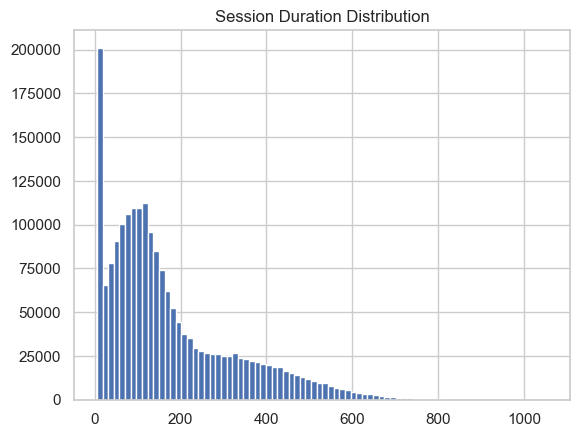

In [18]:
sessions["Session_Duration"].hist(bins=80)
plt.title("Session Duration Distribution")
plt.show()

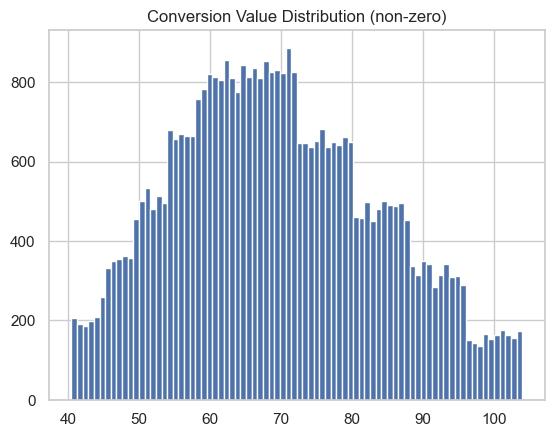

In [19]:
sessions["Conversion_Value"].replace(0, np.nan).dropna().hist(bins=80)
plt.title("Conversion Value Distribution (non-zero)")
plt.show()

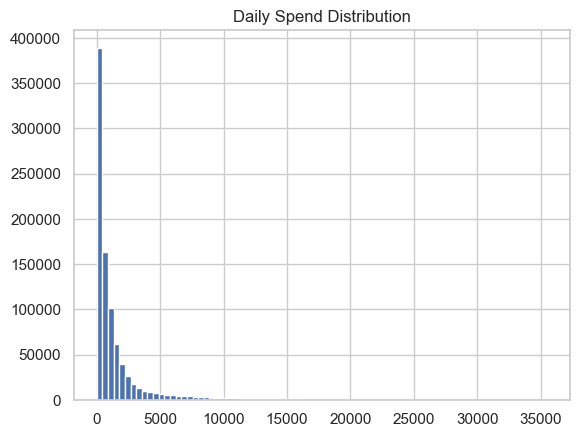

In [20]:
campaigns["Spend"].hist(bins=80)
plt.title("Daily Spend Distribution")
plt.show()

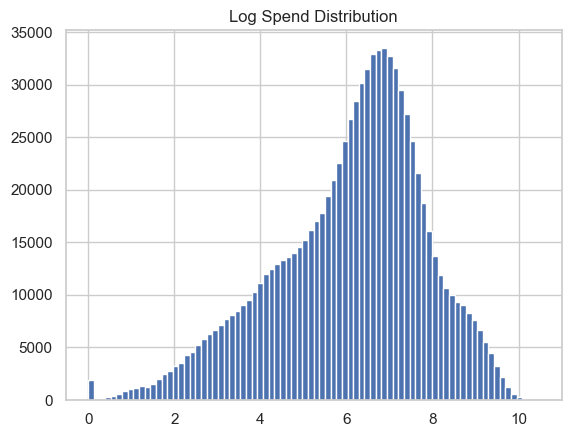

In [21]:
np.log1p(campaigns["Spend"]).hist(bins=80)
plt.title("Log Spend Distribution")
plt.show()

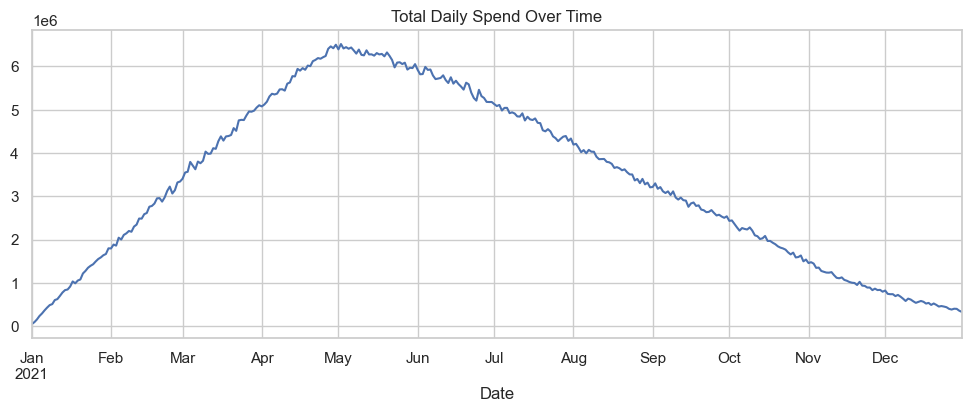

In [22]:
campaigns.groupby("Date")["Spend"].sum().plot(figsize=(12,4))
plt.title("Total Daily Spend Over Time")
plt.show()

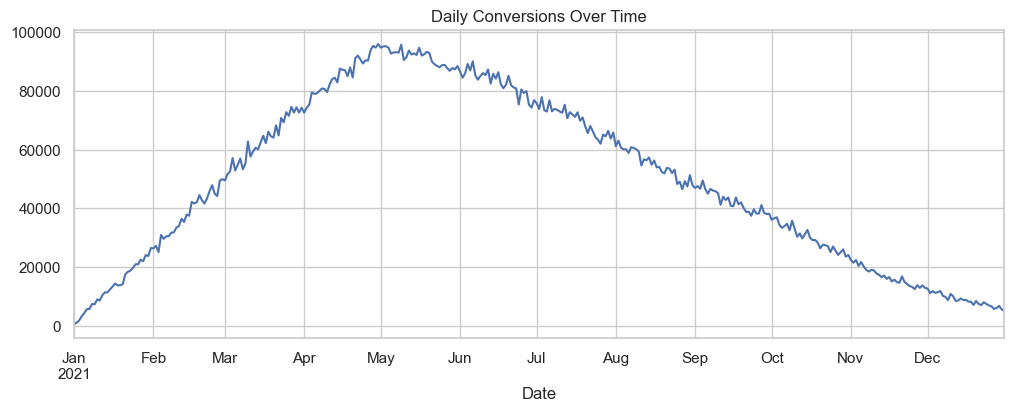

In [23]:
campaigns.groupby("Date")["Conversions"].sum().plot(figsize=(12,4))
plt.title("Daily Conversions Over Time")
plt.show()

In [52]:
print("Channels in campaigns_daily:")
print(campaigns["Channel"].value_counts())

print("\nChannels in sessions:")
print(sessions["Channel"].value_counts())

Channels in campaigns_daily:
Channel
Facebook      181387
Instagram     161464
Google Ads    161411
Website       158278
Email         125780
YouTube       109201
Name: count, dtype: int64

Channels in sessions:
Channel
Facebook      505816
Instagram     466117
YouTube       408417
Google Ads    304258
Email         235918
Website        79474
Name: count, dtype: int64


In [53]:
#Customers in sessions not present in customer table
missing_customers = sessions[~sessions["Customer_ID"].isin(customers["Customer_ID"])]
print("Sessions with unknown customers:", missing_customers.shape)

Sessions with unknown customers: (0, 15)


In [54]:
#Campaigns referenced in sessions
missing_campaigns = sessions[~sessions["Campaign_ID"].isin(campaigns["Campaign_ID"])]
print("Sessions with unknown campaigns:", missing_campaigns.shape)

Sessions with unknown campaigns: (0, 15)


In [55]:
campaigns["CTR"] = campaigns["Clicks"] / campaigns["Impressions"]
campaigns["CVR"] = campaigns["Conversions"] / campaigns["Clicks"].replace(0, np.nan)
campaigns["CPA"] = campaigns["Spend"] / campaigns["Conversions"].replace(0, np.nan)
campaigns["ROAS"] = campaigns["Revenue"] / campaigns["Spend"].replace(0, np.nan)

print(campaigns[["CTR","CVR","CPA","ROAS"]].describe().T)

         count        mean         std        min        25%         50%  \
CTR   897521.0    0.043594    0.083431   0.000000   0.007158    0.010941   
CVR   895613.0    0.031150    0.022333   0.000000   0.012848    0.032099   
CPA   714701.0  153.033464  173.880453  11.050093  67.326667  113.280000   
ROAS  895613.0    0.607973    0.623072   0.000000   0.176985    0.455720   

             75%          max  
CTR     0.015598     0.271770  
CVR     0.047244     0.135348  
CPA   178.301667  6472.670000  
ROAS    0.838046     7.079486  


In [56]:
def find_outliers(s):
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr
    return (s > upper).sum(), (s < lower).sum()

cols_to_test = ["Spend","Clicks","Impressions","Revenue"]

for col in cols_to_test:
    high, low = find_outliers(campaigns[col])
    print(f"{col}: High outliers={high}, Low outliers={low}")

Spend: High outliers=89602, Low outliers=0
Clicks: High outliers=117567, Low outliers=0
Impressions: High outliers=17176, Low outliers=0
Revenue: High outliers=118422, Low outliers=0


In [57]:
print("CAMPAIGNS SUMMARY:")
print(campaigns.describe(include='all'))

print("\nSESSIONS SUMMARY:")
print(sessions.describe(include='all'))

CAMPAIGNS SUMMARY:
                                 Date    Campaign_ID              Company  \
count                          897521  897521.000000               897521   
unique                            NaN            NaN                    7   
top                               NaN            NaN  Innovate Industries   
freq                              NaN            NaN               137262   
mean    2021-06-09 00:08:04.695066112    2516.713409                  NaN   
min               2021-01-01 00:00:00       1.000000                  NaN   
25%               2021-04-13 00:00:00    1267.000000                  NaN   
50%               2021-06-02 00:00:00    2526.000000                  NaN   
75%               2021-07-31 00:00:00    3771.000000                  NaN   
max               2021-12-31 00:00:00    5000.000000                  NaN   
std                               NaN    1444.468031                  NaN   

         Channel Campaign_Type Target_Audience    Impres

In [58]:
# Ensure KPIs already exist
campaigns["CTR"] = campaigns["Clicks"] / campaigns["Impressions"]
campaigns["CVR"] = campaigns["Conversions"] / campaigns["Clicks"].replace(0, np.nan)
campaigns["CPA"] = campaigns["Spend"] / campaigns["Conversions"].replace(0, np.nan)
campaigns["ROAS"] = campaigns["Revenue"] / campaigns["Spend"].replace(0, np.nan)

# Group by channel
channel_perf = campaigns.groupby("Channel").agg(
    Impressions = ("Impressions", "sum"),
    Clicks = ("Clicks", "sum"),
    Conversions = ("Conversions", "sum"),
    Spend = ("Spend", "sum"),
    Revenue = ("Revenue", "sum"),
    
    CTR = ("CTR", "mean"),
    CVR = ("CVR", "mean"),
    CPA = ("CPA", "mean"),
    ROAS = ("ROAS", "mean")
).reset_index()

print(channel_perf)

      Channel  Impressions     Clicks  Conversions         Spend  \
0       Email   1412806342  353078560     14104517  6.683855e+08   
1    Facebook   3168090199   31739596      1185900  1.284927e+08   
2  Google Ads   1908105039   19139103       691543  1.405471e+08   
3   Instagram   2893282108   29011102      1089352  1.381669e+08   
4     Website    481925126    4764530       123267  9.570098e+06   
5     YouTube   2556310123   25639635       977377  1.421643e+08   

        Revenue       CTR       CVR         CPA      ROAS  
0  9.494995e+08  0.249898  0.039827   95.426344  1.458362  
1  7.892656e+07  0.009996  0.033087  135.256383  0.579496  
2  4.576501e+07  0.010011  0.031042  246.188233  0.285970  
3  7.182162e+07  0.010016  0.033431  159.013746  0.495171  
4  8.150585e+06  0.009813  0.017241   65.309903  0.539752  
5  6.422519e+07  0.010025  0.034662  184.446225  0.416057  


In [59]:
channel_map = {
    "Facebook Desktop": "Facebook",
    "Facebook Mobile": "Facebook",
    "Google Ad": "Google Ads",
    "Google Ads": "Google Ads",
    "Youtube": "YouTube",
    "Email": "Email",
    "Website": "Website"
}

sessions["Channel"] = sessions["Channel"].map(channel_map).fillna(sessions["Channel"])
campaigns["Channel"] = campaigns["Channel"].map(channel_map).fillna(campaigns["Channel"])
emails["Channel"] = "Email"   # if needed


In [60]:
cust_df = customers.copy()

In [61]:
sess_agg = sessions.groupby("Customer_ID").agg(
    total_sessions = ("Session_ID", "count"),
    total_page_views = ("Page_Views", "sum"),
    avg_page_views = ("Page_Views", "mean"),
    
    total_clicks = ("Clicks", "sum"),
    total_conversions = ("Conversion", "sum"),
    total_conversion_value = ("Conversion_Value", "sum"),
    
    avg_session_duration = ("Session_Duration", "mean"),
    max_session_duration = ("Session_Duration", "max"),
    
    total_acquisition_cost = ("Acquisition_Cost", "sum"),
    
    engagement_score = ("Engagement_Score", "mean")
).reset_index()


In [62]:
channel_features = (
    sessions.pivot_table(
        index="Customer_ID",
        columns="Channel",
        values="Session_ID",
        aggfunc="count"
    )
    .add_prefix("sessions_from_")
    .reset_index()
)

In [63]:
email_agg = emails.groupby("Customer_ID").agg(
    emails_sent = ("Sent", "sum"),
    emails_opened = ("Opened", "sum"),
    emails_clicked = ("Clicked", "sum"),
    emails_bounced = ("Bounced", "sum")
).reset_index()

email_agg["email_open_rate"] = email_agg["emails_opened"] / email_agg["emails_sent"]
email_agg["email_click_rate"] = email_agg["emails_clicked"] / email_agg["emails_opened"].replace(0, np.nan)


In [64]:
customer_campaigns = sessions.groupby("Customer_ID").agg(
    unique_campaigns_seen = ("Campaign_ID", "nunique"),
    most_used_campaign = ("Campaign_ID", lambda x: x.value_counts().index[0])
).reset_index()

In [65]:
campaign_channel_exposure = (
    sessions.groupby(["Customer_ID", "Channel"])
    .size()
    .unstack(fill_value=0)
    .add_prefix("campaign_exposure_")
    .reset_index()
)

In [66]:
master = (
    cust_df
    .merge(sess_agg, on="Customer_ID", how="left")
    .merge(channel_features, on="Customer_ID", how="left")
    .merge(email_agg, on="Customer_ID", how="left")
    .merge(customer_campaigns, on="Customer_ID", how="left")
    .merge(campaign_channel_exposure, on="Customer_ID", how="left")
)

In [67]:
master = master.fillna({
    "total_sessions": 0,
    "total_page_views": 0,
    "avg_page_views": 0,
    "total_clicks": 0,
    "total_conversions": 0,
    "total_conversion_value": 0,
    "avg_session_duration": 0,
    "max_session_duration": 0,
    "emails_sent": 0,
    "emails_opened": 0,
    "emails_clicked": 0,
    "emails_bounced": 0,
    "email_open_rate": 0,
    "email_click_rate": 0,
})


In [68]:
master.shape

(400000, 39)

In [24]:
master.columns

Index(['Customer_ID', 'Age', 'Gender', 'Location', 'Language',
       'Customer_Segment', 'Acquisition_Channel', 'First_Seen_Date',
       'Total_Revenue', 'total_sessions', 'total_page_views', 'avg_page_views',
       'total_clicks', 'total_conversions', 'total_conversion_value',
       'avg_session_duration', 'max_session_duration',
       'total_acquisition_cost', 'engagement_score', 'sessions_from_Email',
       'sessions_from_Facebook', 'sessions_from_Google Ads',
       'sessions_from_Instagram', 'sessions_from_Website',
       'sessions_from_YouTube', 'emails_sent', 'emails_opened',
       'emails_clicked', 'emails_bounced', 'email_open_rate',
       'email_click_rate', 'unique_campaigns_seen', 'most_used_campaign',
       'campaign_exposure_Email', 'campaign_exposure_Facebook',
       'campaign_exposure_Google Ads', 'campaign_exposure_Instagram',
       'campaign_exposure_Website', 'campaign_exposure_YouTube'],
      dtype='object')

In [69]:
features_to_use = [
    'Age', 'Gender', 'Acquisition_Channel', 'Total_Revenue',
    'total_sessions', 'total_page_views', 'avg_page_views', 'total_clicks',
    'total_conversions', 'total_conversion_value', 'avg_session_duration',
    'max_session_duration', 'total_acquisition_cost', 'engagement_score',
    
    # Sessions from channels
    'sessions_from_Email', 'sessions_from_Facebook', 'sessions_from_Google Ads',
    'sessions_from_Instagram', 'sessions_from_Website', 'sessions_from_YouTube',
    
    # Email behavior
    'emails_sent', 'emails_opened', 'emails_clicked',
    'email_open_rate', 'email_click_rate',
    
    # Campaign exposure
    'unique_campaigns_seen',
    'campaign_exposure_Email', 'campaign_exposure_Facebook',
    'campaign_exposure_Google Ads', 'campaign_exposure_Instagram',
    'campaign_exposure_Website', 'campaign_exposure_YouTube'
]


In [70]:
X = master[features_to_use].copy()

X = X.fillna(0)


In [71]:
X = pd.get_dummies(X, columns=['Gender', 'Acquisition_Channel'], drop_first=True)

In [72]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal')

X_scaled = qt.fit_transform(X)

In [73]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

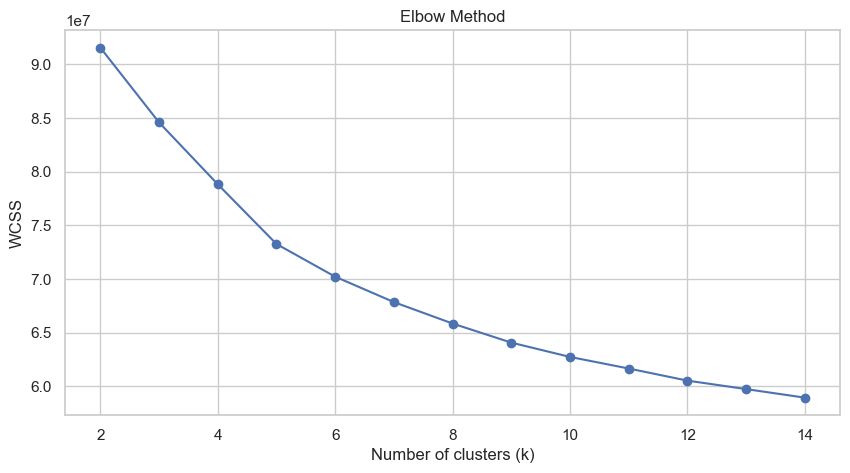

In [74]:
wcss = []
K = range(2, 15)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(K, wcss, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [76]:
from sklearn.cluster import KMeans

# ---- RUN KMEANS (k=6) ----
k = 6
kmeans = KMeans(n_clusters=k, 
                random_state=42, 
                n_init=20, 
                max_iter=500)

clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the master table
master['cluster'] = clusters

print("Cluster assignment complete!")
master['cluster'].value_counts()

Cluster assignment complete!


cluster
0    79915
1    73002
3    72250
4    66953
2    59889
5    47991
Name: count, dtype: int64

In [80]:
cluster_centers = pd.DataFrame(
    kmeans.cluster_centers_, 
    columns=X.columns
)

cluster_centers

,Age,Total_Revenue,total_sessions,total_page_views,avg_page_views,total_clicks,total_conversions,total_conversion_value,avg_session_duration,max_session_duration,...,campaign_exposure_Instagram,campaign_exposure_Website,campaign_exposure_YouTube,Gender_Male,Gender_Other,Acquisition_Channel_Facebook,Acquisition_Channel_Google Ads,Acquisition_Channel_Instagram,Acquisition_Channel_Website,Acquisition_Channel_YouTube
0,-0.107096,-2.717722,-0.003760,-0.020218,-0.027853,-0.350999,-4.517621,-4.521436,-0.028539,-0.022031,...,-1.260157,-4.017745,-1.507089,-0.205007,-4.979822,5.199338,-5.199338,-5.199338,-5.199338,-5.199338
1,-0.108222,-2.719230,-0.008012,-0.017866,-0.022963,-0.364383,-4.533303,-4.537402,-0.022299,-0.018757,...,-1.258787,-4.019813,-1.486841,-5.199338,-4.792946,-5.199338,2.218276,-5.199338,-5.199338,-5.199338
2,-0.096574,-2.723117,-0.008097,-0.018512,-0.025344,-0.355837,-4.534610,-4.537809,-0.025096,-0.021116,...,-1.287008,-3.982245,-1.496225,-0.231018,-4.978303,-5.199338,-5.199338,-5.199338,5.199338,-5.199338
3,-0.111902,-2.715936,-0.017774,-0.030578,-0.031974,-0.366181,-4.533671,-4.537133,-0.034173,-0.032760,...,-1.280488,-4.016316,-1.498395,-0.197467,-4.998704,-5.199338,-5.199338,5.199338,-5.199338,-5.199338
4,-0.099753,-2.721705,-0.001161,-0.015939,-0.025496,-0.363669,-4.533395,-4.537898,-0.025794,-0.017993,...,-1.264489,-3.984882,-1.500948,5.199338,-5.199338,-5.199338,2.192011,-5.199338,-5.199338,-5.199338
5,-0.095379,-2.721995,-0.009876,-0.024340,-0.032315,-0.365468,-4.520121,-4.522501,-0.031970,-0.024896,...,-1.263418,-4.016176,-1.529050,-0.214405,-4.989158,-5.199338,-5.199338,-5.199338,-5.199338,5.199338


In [81]:
cluster_centers_rank = cluster_centers.rank(pct=True, axis=1)
cluster_centers_rank

,Age,Total_Revenue,total_sessions,total_page_views,avg_page_views,total_clicks,total_conversions,total_conversion_value,avg_session_duration,max_session_duration,...,campaign_exposure_Instagram,campaign_exposure_Website,campaign_exposure_YouTube,Gender_Male,Gender_Other,Acquisition_Channel_Facebook,Acquisition_Channel_Google Ads,Acquisition_Channel_Instagram,Acquisition_Channel_Website,Acquisition_Channel_YouTube
0,0.729730,0.324324,0.945946,0.891892,0.810811,0.675676,0.243243,0.216216,0.783784,0.864865,...,0.527027,0.283784,0.472973,0.702703,0.135135,1.000000,0.027027,0.108108,0.054054,0.081081
1,0.729730,0.351351,0.918919,0.891892,0.810811,0.702703,0.270270,0.243243,0.837838,0.864865,...,0.554054,0.310811,0.500000,0.135135,0.162162,0.081081,1.000000,0.108108,0.027027,0.054054
2,0.729730,0.324324,0.945946,0.891892,0.810811,0.675676,0.243243,0.216216,0.837838,0.864865,...,0.527027,0.283784,0.472973,0.702703,0.135135,0.054054,0.027027,0.108108,1.000000,0.081081
3,0.729730,0.324324,0.945946,0.891892,0.864865,0.675676,0.243243,0.216216,0.783784,0.837838,...,0.527027,0.283784,0.472973,0.702703,0.135135,0.108108,0.027027,1.000000,0.054054,0.081081
4,0.702703,0.324324,0.918919,0.864865,0.783784,0.675676,0.243243,0.216216,0.756757,0.837838,...,0.527027,0.283784,0.472973,1.000000,0.108108,0.054054,0.972973,0.135135,0.027027,0.081081
5,0.729730,0.324324,0.945946,0.891892,0.810811,0.675676,0.243243,0.216216,0.837838,0.864865,...,0.527027,0.283784,0.472973,0.702703,0.135135,0.054054,0.027027,0.081081,0.108108,1.000000


In [82]:
channel_cols = [
    'sessions_from_Email', 'sessions_from_Facebook', 'sessions_from_Google Ads',
    'sessions_from_Instagram', 'sessions_from_Website',
    'sessions_from_YouTube'
]

cluster_channel_means = master.groupby('cluster')[channel_cols].mean()
cluster_channel_means_rank = cluster_channel_means.rank(pct=True)
cluster_channel_means_rank

,sessions_from_Email,sessions_from_Facebook,sessions_from_Google Ads,sessions_from_Instagram,sessions_from_Website,sessions_from_YouTube
cluster,,,,,,
0,0.333333,0.833333,0.833333,1.000000,1.000000,0.333333
1,1.000000,1.000000,0.166667,0.833333,0.666667,0.500000
2,0.666667,0.666667,0.666667,0.333333,0.166667,0.666667
3,0.166667,0.500000,0.500000,0.166667,0.500000,0.166667
4,0.500000,0.333333,1.000000,0.666667,0.833333,1.000000
5,0.833333,0.166667,0.333333,0.500000,0.333333,0.833333


In [ ]:
"""Cluster 1 — “Email + Facebook Loyalists (High Value)”
Why:

Email = 1.00 (highest)

Facebook = 1.00

Instagram = 0.83

Good browsing + best conversion among clusters (from earlier ranks)

Best Channel:

⭐ Email
⭐ Facebook

These users respond extremely well to direct communication and social engagement.

🔥 Cluster 0 — “Social + Website Explorers (High Research Behavior)”
Why:

Instagram = 1.00

Website = 1.00

Facebook + Google Ads = 0.83

Low conversion, high browsing (research-heavy)

Best Channel:

⭐ Instagram
⭐ Website
⭐ Facebook retargeting

They discover products visually and read a lot.

🔥 Cluster 4 — “Google Ads + YouTube Discovery Users”
Why:

Google Ads = 1.00

YouTube = 1.00

Website = 0.83

High sessions and browsing

Best Channel:

⭐ Google Ads
⭐ YouTube Ads
(Skippable + in-stream works best)

🔥 Cluster 5 — “Email + YouTube Deep Engagers”
Why:

Email = 0.83

YouTube = 0.83

Instagram = 0.50

Long session duration cluster

Best Channel:

⭐ Email
⭐ YouTube

They consume long-format content and respond to reminders.

🔥 Cluster 2 — “Multi-Channel Light Converters (Balanced Users)”
Why:

Email, Facebook, Google Ads, YouTube all = 0.66

No extreme pattern — spread exposure

Moderate browsing, moderate engagement

Best Channel:

⭐ Facebook or Google Ads (cheapest CAC)
since these overlap their average exposure.

(This cluster needs cost-efficient campaigns.)

🔥 Cluster 3 — “Low-Exposure, Low-Engagement Drifters”
Why:

All channels ~0.16–0.50 (lowest overall)

These users arrive intermittently

They don’t have a strong channel preference

Best Channel:

⭐ Website SEO
⭐ Retargeting (cheap frequency)

Don’t spend aggressively here — they are not brand-loyal."""

In [ ]:
Cluster	Segment Name	Behavior Summary	Best Channels
1	Email + Facebook Loyalists      	High revenue, strong engagement   	Email, Facebook, Instagram
0	Social + Website Explorers	    Heavy browsing, research-oriented	  Instagram, Website, Facebook
4	Google + YouTube Discoverers	  High Google Ads + YT traffic	  Google Ads, YouTube
5	Email + YouTube Deep Engagers	Long sessions, deep content	       Email, YouTube
2	Balanced Multi-Channel Users	  Moderate everything	          Facebook or Google Ads
3	Low-Exposure Drifters	         Low activity	                        SEO, Retargeting

In [83]:
def recommend_channel(row):
    cluster = row['cluster']

    if cluster == 1:
        return "Email"
    elif cluster == 0:
        return "Instagram"
    elif cluster == 4:
        return "Google Ads"
    elif cluster == 5:
        return "Email or YouTube"
    elif cluster == 2:
        # choose channel with highest personal sessions
        return row[['sessions_from_Email', 'sessions_from_Facebook', ...]].idxmax()
    else:
        return "Retargeting"

In [84]:
# Best channel per cluster (segment-level recommendation)
cluster_best_channel = {
    1: "Email",                # Email + FB Loyalists
    0: "Instagram",            # Social + Website Explorers
    4: "Google Ads",           # Google + YouTube Discoverers
    5: "Email/YouTube",        # Deep Engagers
    2: "Multi-Channel",        # Balanced users (needs per-user logic)
    3: "Retargeting/SEO"       # Low exposure drifters
}

In [88]:

# make sure these are the exact channel column names in your master df
channel_cols = [
    'sessions_from_Email',
    'sessions_from_Facebook',
    'sessions_from_Google Ads',
    'sessions_from_Instagram',
    'sessions_from_Website',
    'sessions_from_YouTube'
]

# 1) compute per-customer personal best channel (vectorized)
# fillna(0) so idxmax is safe and we can detect rows with all zeros
channel_df = master[channel_cols].fillna(0)

# max value per row (used to identify all-zero rows)
row_max = channel_df.max(axis=1)

# idxmax gives the column name with the highest sessions; it's safe now because we filled NA with 0
best_idx = channel_df.idxmax(axis=1).astype(object)  # ensure object dtype

# convert 'sessions_from_X' -> 'X'
personal_best = best_idx.str.replace('sessions_from_', '', regex=False)

# where row_max == 0 there was no activity; set personal_best to NaN (or any fallback)
personal_best[row_max == 0] = np.nan

# attach to master
master['personal_best_channel'] = personal_best

# 2) cluster-level canonical mapping (as before)
cluster_best_channel = {
    1: "Email",                # Email + FB Loyalists
    0: "Instagram",            # Social + Website Explorers
    4: "Google Ads",           # Google + YouTube Discoverers
    5: "Email/YouTube",        # Deep Engagers (we refine below)
    2: "Multi-Channel",        # Balanced users (use personal best)
    3: "Retargeting/SEO"       # Low exposure drifters
}

# 3) build recommended_channel in a vectorized manner

# start with default empty value
master['recommended_channel'] = np.nan

# clusters with fixed recommendations (0,1,4)
for c in [0, 1, 4]:
    master.loc[master['cluster'] == c, 'recommended_channel'] = cluster_best_channel[c]

# cluster 3 => Retargeting (cheap reactivation)
master.loc[master['cluster'] == 3, 'recommended_channel'] = "Retargeting"

# cluster 2 => use personal best channel where available, otherwise fallback to 'Retargeting'
mask_c2 = (master['cluster'] == 2)
master.loc[mask_c2, 'recommended_channel'] = master.loc[mask_c2, 'personal_best_channel']
master.loc[mask_c2 & master['recommended_channel'].isna(), 'recommended_channel'] = "Retargeting"

# cluster 5 => choose between Email & YouTube (use personal counts)
mask_c5 = (master['cluster'] == 5)
# if either column missing, treat as 0 via fillna(0)
email_vals = master.loc[mask_c5, 'sessions_from_Email'].fillna(0)
yt_vals    = master.loc[mask_c5, 'sessions_from_YouTube'].fillna(0)
master.loc[mask_c5 & (email_vals >= yt_vals), 'recommended_channel'] = "Email"
master.loc[mask_c5 & (email_vals < yt_vals), 'recommended_channel'] = "YouTube"

# cluster 1 is Email by default but if you prefer to apply personal check:
# (we left cluster 1 mapped to Email)

# final fallback: any remaining NaNs -> "Retargeting"
master['recommended_channel'] = master['recommended_channel'].fillna("Retargeting")

# 4) quick check
print(master['recommended_channel'].value_counts())
# optionally inspect the first few rows with the new columns
master[['cluster','personal_best_channel','recommended_channel']].head(10)


C:\Users\ayesh\AppData\Local\Temp\ipykernel_10772\2848171244.py:47: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Instagram' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  master.loc[master['cluster'] == c, 'recommended_channel'] = cluster_best_channel[c]


recommended_channel
Email          109420
Instagram       91984
Google Ads      74395
Retargeting     72678
YouTube         29403
Facebook        21672
Website           448
Name: count, dtype: int64


,cluster,personal_best_channel,recommended_channel
0,1,Google Ads,Email
1,3,YouTube,Retargeting
2,1,Facebook,Email
3,0,Instagram,Instagram
4,1,Facebook,Email
5,3,Email,Retargeting
6,0,Google Ads,Instagram
7,4,Facebook,Google Ads
8,2,Instagram,Instagram
9,3,Facebook,Retargeting


In [91]:
import numpy as np
import pandas as pd

channel_cols = [
    'sessions_from_Email',
    'sessions_from_Facebook',
    'sessions_from_Google Ads',
    'sessions_from_Instagram',
    'sessions_from_Website',
    'sessions_from_YouTube'
]

# 1) Create a channel-only dataframe, fill NA -> 0
channel_df = master[channel_cols].fillna(0)

# 2) personal_best: column name of the max channel per row, but set to NaN if all zeros
row_max = channel_df.max(axis=1)
best_idx = channel_df.idxmax(axis=1).astype(object)   # safe cast
personal_best = best_idx.str.replace('sessions_from_', '', regex=False)
personal_best[row_max == 0] = np.nan
master['personal_best_channel'] = personal_best

# 3) cluster-level canonical mapping
cluster_best_channel = {
    1: "Email",
    0: "Instagram",
    4: "Google Ads",
    5: "Email/YouTube",
    2: "Multi-Channel",
    3: "Retargeting/SEO"
}

# 4) Build recommendations vectorized
master['recommended_channel'] = np.nan

# Clusters with fixed picks
for c in [0, 1, 4]:
    master.loc[master['cluster'] == c, 'recommended_channel'] = cluster_best_channel[c]

# Cluster 3 -> Retargeting
master.loc[master['cluster'] == 3, 'recommended_channel'] = "Retargeting"

# Cluster 2 -> personal best if available, else Retargeting
mask_c2 = (master['cluster'] == 2)
master.loc[mask_c2, 'recommended_channel'] = master.loc[mask_c2, 'personal_best_channel']
master.loc[mask_c2 & master['recommended_channel'].isna(), 'recommended_channel'] = "Retargeting"

# Cluster 5 -> choose between Email & YouTube using counts
mask_c5 = (master['cluster'] == 5)
email_vals = master.loc[mask_c5, 'sessions_from_Email'].fillna(0)
yt_vals    = master.loc[mask_c5, 'sessions_from_YouTube'].fillna(0)
master.loc[mask_c5 & (email_vals >= yt_vals), 'recommended_channel'] = "Email"
master.loc[mask_c5 & (email_vals < yt_vals), 'recommended_channel'] = "YouTube"

# final fallback
master['recommended_channel'] = master['recommended_channel'].fillna("Retargeting")

# quick check
print(master['recommended_channel'].value_counts())


C:\Users\ayesh\AppData\Local\Temp\ipykernel_10772\3084041955.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Instagram' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  master.loc[master['cluster'] == c, 'recommended_channel'] = cluster_best_channel[c]


recommended_channel
Email          109420
Instagram       91984
Google Ads      74395
Retargeting     72678
YouTube         29403
Facebook        21672
Website           448
Name: count, dtype: int64


In [89]:
pd.DataFrame.from_dict({
    0: "Instagram",
    1: "Email",
    2: "Personal Best (Multi-channel)",
    3: "Retargeting",
    4: "Google Ads",
    5: "Email / YouTube"
}, orient='index', columns=['Best_Channel'])

,Best_Channel
0,Instagram
1,Email
2,Personal Best (Multi-channel)
3,Retargeting
4,Google Ads
5,Email / YouTube


In [97]:
# 0) BACKUP master (so you can revert if needed)
master_backup = master.copy()

# 1) ensure recommended_channel exists as object dtype (prevents dtype warnings)
master['recommended_channel'] = pd.Series(index=master.index, dtype='object')

# 2) define channel cols and cluster mapping
channel_cols = [
    'sessions_from_Email','sessions_from_Facebook','sessions_from_Google Ads',
    'sessions_from_Instagram','sessions_from_Website','sessions_from_YouTube'
]

# 3) recompute personal_best_channel safely (vectorized)
ch_df = master[channel_cols].fillna(0)
row_max = ch_df.max(axis=1)
best_idx = ch_df.idxmax(axis=1).astype(object)
personal_best = best_idx.str.replace('sessions_from_', '', regex=False)
personal_best[row_max == 0] = np.nan                   # mark users with no channel activity
master['personal_best_channel'] = personal_best

# 4) deterministic cluster-level mapping
cluster_best_channel = {0: "Instagram", 1: "Email", 4: "Google Ads"}  # fixed picks
# reset recommended_channel so prior values are removed
master['recommended_channel'] = np.nan

# 5) assign fixed picks (clusters 0,1,4)
for c, ch in cluster_best_channel.items():
    master.loc[master['cluster'] == c, 'recommended_channel'] = ch

# 6) cluster 5 -> pick Email vs YouTube per user
mask5 = master['cluster'] == 5
email_vals = master.loc[mask5, 'sessions_from_Email'].fillna(0)
yt_vals = master.loc[mask5, 'sessions_from_YouTube'].fillna(0)
master.loc[mask5 & (email_vals >= yt_vals), 'recommended_channel'] = "Email"
master.loc[mask5 & (email_vals < yt_vals), 'recommended_channel'] = "YouTube"

# 7) cluster 2 -> personal best if exists, otherwise Retargeting
mask2 = master['cluster'] == 2
master.loc[mask2, 'recommended_channel'] = master.loc[mask2, 'personal_best_channel']
master.loc[mask2 & master['recommended_channel'].isna(), 'recommended_channel'] = "Retargeting"

# 8) cluster 3 -> Retargeting
master.loc[master['cluster'] == 3, 'recommended_channel'] = "Retargeting"

# 9) final fallback (safety)
master['recommended_channel'] = master['recommended_channel'].fillna("Retargeting")

# 10) results: counts + cluster x recommended crosstab
print(master['recommended_channel'].value_counts())
print("\nCluster vs Recommended Channel cross-tab:")
print(pd.crosstab(master['cluster'], master['recommended_channel']))

C:\Users\ayesh\AppData\Local\Temp\ipykernel_10772\463465485.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Instagram' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  master.loc[master['cluster'] == c, 'recommended_channel'] = ch


recommended_channel
Email          109420
Instagram       91984
Google Ads      74395
Retargeting     72678
YouTube         29403
Facebook        21672
Website           448
Name: count, dtype: int64

Cluster vs Recommended Channel cross-tab:
recommended_channel  Email  Facebook  Google Ads  Instagram  Retargeting  \
cluster                                                                    
0                        0         0           0      79915            0   
1                    73002         0           0          0            0   
2                     9967     21672        7442      12069          428   
3                        0         0           0          0        72250   
4                        0         0       66953          0            0   
5                    26451         0           0          0            0   

recommended_channel  Website  YouTube  
cluster                                
0                          0        0  
1                          0

In [98]:
master.to_csv(r"C:\Users\ayesh\OneDrive\Documents\Channel affinity\data\master_with_recommendations.csv", index=False)


In [100]:
# 1) safe channel dataframe (no NaNs)
ch_df = master[channel_cols].fillna(0)

# 2) compute row-wise argsort descending (use negative for descending)
arr = ch_df.values  # numpy array shape (n_rows, n_channels)
sorted_idx = np.argsort(-arr, axis=1)   # indices of columns sorted desc per row

# 3) map indices back to channel names using a numpy array of column names
col_names = ch_df.columns.values  # numpy array of names
sorted_channel_names = col_names[sorted_idx]  # shape (n_rows, n_channels)

# 4) convert to DataFrame with same index as master
sorted_df = pd.DataFrame(
    sorted_channel_names,
    index=ch_df.index,
    columns=[f'rank_{i+1}' for i in range(sorted_channel_names.shape[1])]
)

# 5) remove the 'sessions_from_' prefix for readability
for c in sorted_df.columns:
    sorted_df[c] = sorted_df[c].str.replace("sessions_from_", "", regex=False)

# 6) set best_channel_1/2/3 in master (and make NaN where there was zero activity)
row_max = arr.max(axis=1)
# build the three series aligned to master.index
master['best_channel_1'] = sorted_df['rank_1'].where(row_max > 0, other=np.nan)
master['best_channel_2'] = sorted_df['rank_2'].where(row_max > 0, other=np.nan)
master['best_channel_3'] = sorted_df['rank_3'].where(row_max > 0, other=np.nan)

# 7) quick validation (sample)
print(master[['best_channel_1','best_channel_2','best_channel_3']].head(10))
print(master[['best_channel_1','best_channel_2','best_channel_3']].isna().sum())

# 8) export CSV (optional)
master.to_csv(r"C:\Users\ayesh\OneDrive\Documents\Channel affinity\data\master_with_top3_channels.csv", index=False)
print("Saved: master_with_top3_channels.csv")


  best_channel_1 best_channel_2 best_channel_3
0     Google Ads        YouTube       Facebook
1        YouTube      Instagram       Facebook
2       Facebook      Instagram          Email
3      Instagram          Email       Facebook
4       Facebook          Email        Website
5          Email      Instagram       Facebook
6     Google Ads          Email       Facebook
7       Facebook          Email     Google Ads
8      Instagram     Google Ads       Facebook
9       Facebook      Instagram        YouTube
best_channel_1    2758
best_channel_2    2758
best_channel_3    2758
dtype: int64
Saved: master_with_top3_channels.csv
